In [35]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import yfinance as yf
import datetime as datetime
#CREAMOS UN DATAFRAME CON LA TABLA DE WIKIPEDIA
wiki_url_500_list = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"            #url del sp de wikipedia
wiki_df = pd.read_html(wiki_url_500_list)                               
df_ticker = wiki_df[0]                                                                     #lo hacemos para extraer el symbol
print(df_ticker)
list_500 = list(df_ticker.Symbol.values)                                                   #lo guardamos en una lista

#USAMOS LA LISTA DE TICKERS Y DESCARGAMOS C/UNO
#df_sp = yf.download(list_500, start = '2000-1-1')                          #hacemos un dataframe con todo junto
#print(df_sp)
for i in range(0,len(list_500)):
    list_500[i] = list_500[i].replace('.','-')                               #reemplazamos para no dejar afuera algunas acciones

df_list = []
for e in list_500:
    df = yf.download(e, group_by='Ticker', start = '2000-01-01', end = '2021-12-31')
    if df_ticker.shape[0] != 0:
        df['Symbol'] = e
        df_list.append(df)

    Symbol              Security SEC filings             GICS Sector  \
0      MMM                    3M     reports             Industrials   
1      AOS           A. O. Smith     reports             Industrials   
2      ABT                Abbott     reports             Health Care   
3     ABBV                AbbVie     reports             Health Care   
4     ABMD               Abiomed     reports             Health Care   
..     ...                   ...         ...                     ...   
498    YUM           Yum! Brands     reports  Consumer Discretionary   
499   ZBRA    Zebra Technologies     reports  Information Technology   
500    ZBH         Zimmer Biomet     reports             Health Care   
501   ZION  Zions Bancorporation     reports              Financials   
502    ZTS                Zoetis     reports             Health Care   

                      GICS Sub-Industry    Headquarters Location  \
0              Industrial Conglomerates    Saint Paul, Minnesota   

In [36]:
 # los concatenamos para formar un solo dataframe
df_sp500 = pd.concat(df_list)   

df_sp500.reset_index(impace=True)

In [38]:
df_sp500.reset_index(inplace=True)

In [39]:
#Chequeo del dataframe
print(df_sp500)

              Date        Open        High         Low       Close  \
0       2000-01-03   48.031250   48.250000   47.031250   47.187500   
1       2000-01-04   46.437500   47.406250   45.312500   45.312500   
2       2000-01-05   45.562500   48.125000   45.562500   46.625000   
3       2000-01-06   47.156250   51.250000   47.156250   50.375000   
4       2000-01-07   50.562500   51.906250   49.968750   51.375000   
...            ...         ...         ...         ...         ...   
2478157 2021-12-23  241.699997  244.389999  240.690002  242.509995   
2478158 2021-12-27  244.389999  246.720001  243.080002  246.509995   
2478159 2021-12-28  247.000000  247.839996  243.639999  244.250000   
2478160 2021-12-29  244.020004  247.850006  243.639999  247.029999   
2478161 2021-12-30  247.050003  249.270004  244.960007  245.160004   

          Adj Close     Volume Symbol  
0         26.434866  2173400.0    MMM  
1         25.384462  2713800.0    MMM  
2         26.119743  3699400.0    MMM  

Enviamos el dataframe a un csv

In [40]:
df_sp500.to_csv('data_sp500.csv', index=False)

TRABAJAMOS DESDE EL CSV

In [1]:
### EJECUTAR ###
import numpy as np
import pandas as pd
from pandas_datareader import data 
import yfinance as yf
import datetime as datetime
df_sp500 = pd.read_csv('data_sp500.csv', delimiter = ',')

LIMPIEZA DE DATOS GENERAL DE DATOS 

In [2]:
# Datos faltantes
print(df_sp500[df_sp500['Low'].isnull() == True]) 
print(df_sp500[df_sp500['Date'].isnull() == True]) 
print(df_sp500[df_sp500['Open'].isnull() == True])
print(df_sp500[df_sp500['High'].isnull() == True])
print(df_sp500[df_sp500['Close'].isnull() == True])
print(df_sp500[df_sp500['Adj Close'].isnull() == True])
print(df_sp500[df_sp500['Volume'].isnull() == True])
print(df_sp500[df_sp500['Symbol'].isnull() == True])




               Date  Open  High  Low  Close  Adj Close  Volume Symbol
73354    1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN    APD
95495    1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN    ARE
1146374  1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN     HD
1697856  2001-09-12   NaN   NaN  NaN    NaN        NaN     NaN   NVDA
1908905  1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN   QCOM
2018484  1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN    SLB
2446063  1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN    XEL
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Symbol]
Index: []
               Date  Open  High  Low  Close  Adj Close  Volume Symbol
73354    1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN    APD
95495    1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN    ARE
1146374  1999-12-31   NaN   NaN  NaN    NaN        NaN     NaN     HD
1697856  2001-09-12   NaN   NaN  NaN    NaN        NaN     NaN   NV

In [2]:
### EJECUTAR ###
#Borramos los datos faltantes porque son pocas lineas
df_sp500.dropna(inplace=True)

In [3]:
### EJECUTAR ###
#incorporar fechas de datetime 
df_nuevos = df_sp500.groupby('Symbol').min()[df_sp500.groupby('Symbol').min()['Date'] > '2020-01-01']
print(df_nuevos)


              Date       Open  High    Low      Close  Adj Close   Volume
Symbol                                                                   
CARR    2020-03-19  11.800000  12.0  11.50  11.540000  11.224796    100.0
OGN     2021-05-14  28.299999  29.0  27.25  28.450001  27.524675  18300.0
OTIS    2020-03-19  40.000000  40.0  38.00  40.000000  38.869747   3600.0


In [5]:
#df_sp500['retornos_gaps'] = np.log(df_sp500['Open']/df_sp500['Close'].shift(1)).fillna(0)
#df_sp500['retornos_intra'] = np.log(df_sp500['Close']/df_sp500['Open']).fillna(0)
#df_sp500['variacion'] = df_sp500['Adj Close'].pct_change()
#df_sp500['volatilidad'] = df_sp500['variacion'].rolling(250).std()
#print(df_sp500.head(5))

In [5]:
#no es relevante
df_sp500.groupby('Symbol').min()['Date']

Symbol
A       2000-01-03
AAL     2005-09-27
AAP     2001-11-29
AAPL    2000-01-03
ABBV    2013-01-02
           ...    
YUM     2000-01-03
ZBH     2001-07-25
ZBRA    2000-01-03
ZION    2000-01-03
ZTS     2013-02-01
Name: Date, Length: 502, dtype: object

QUE DIA DE LA SEMANA ES MEJOR PARA INVERTIR 

In [4]:
### EJECUTAR ###
#convertimos a datetime, ya que al ingestarlo al csv se transforma en object
import datetime as dt
df_sp500["Date"] = pd.to_datetime(df_sp500["Date"])

df_sp500['day_of_week'] = df_sp500["Date"].dt.day_name()
df_sp500['month'] = df_sp500["Date"].dt.month_name()


In [26]:
#no es relevante, simplemente un chequeo
print(df_sp500.day_of_week)

0             Monday
1            Tuesday
2          Wednesday
3           Thursday
4             Friday
             ...    
2478157     Thursday
2478158       Monday
2478159      Tuesday
2478160    Wednesday
2478161     Thursday
Name: day_of_week, Length: 2478155, dtype: object


Es necesario concatenar el dataframe principal con la tabla de wikipedia, para extraer el sector y otra info
Vuelvo a ejecutar la siguiente linea de codigo, para no ejecutarla al principio dado que tarda mucho

In [5]:
### EJECUTAR ###
#quiero concatenar la industria 
wiki_url_500_list = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"            #url del sp de wikipedia
wiki_df = pd.read_html(wiki_url_500_list)                               
df_ticker = wiki_df[0]                                                                     #lo hacemos para extraer el symbol
print(df_ticker)

    Symbol              Security SEC filings             GICS Sector  \
0      MMM                    3M     reports             Industrials   
1      AOS           A. O. Smith     reports             Industrials   
2      ABT                Abbott     reports             Health Care   
3     ABBV                AbbVie     reports             Health Care   
4     ABMD               Abiomed     reports             Health Care   
..     ...                   ...         ...                     ...   
498    YUM           Yum! Brands     reports  Consumer Discretionary   
499   ZBRA    Zebra Technologies     reports  Information Technology   
500    ZBH         Zimmer Biomet     reports             Health Care   
501   ZION  Zions Bancorporation     reports              Financials   
502    ZTS                Zoetis     reports             Health Care   

                      GICS Sub-Industry    Headquarters Location  \
0              Industrial Conglomerates    Saint Paul, Minnesota   

In [6]:
### EJECUTAR ###
df_ticker['Symbol'].replace('.','-', inplace=True)
print(df_ticker['Symbol'])

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


Realizamos el merge entre las dos tablas

In [7]:
### EJECUTAR ###
#merge 

df = pd.merge(df_sp500, df_ticker, on='Symbol', how='inner')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol',
       'day_of_week', 'month', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub-Industry', 'Headquarters Location', 'Date first added', 'CIK',
       'Founded'],
      dtype='object')


In [30]:
#NO ES RELEVANTE
print(df.groupby('day_of_week').mean())

                  Open       High        Low      Close  Adj Close  \
day_of_week                                                          
Friday       69.819219  70.587005  69.006506  69.830315  61.562892   
Monday       70.066324  70.852362  69.239998  70.055937  61.825920   
Thursday     70.066704  70.908266  69.234768  70.109425  61.860272   
Tuesday      70.126589  70.925603  69.304537  70.125975  61.886253   
Wednesday    69.944166  70.767355  69.113482  69.957385  61.705667   

                   Volume  retornos_gaps  retornos_intra            CIK  
day_of_week                                                              
Friday       6.241620e+06       0.000101        0.000250  707612.405267  
Monday       5.794797e+06      -0.001591       -0.000309  707839.583739  
Thursday     6.366644e+06      -0.000099        0.000521  707840.007494  
Tuesday      6.158837e+06       0.000522        0.000186  707877.997517  
Wednesday    6.349096e+06       0.000035        0.000242  707687.

CALCULAMOS LOS KPIS RELEVANTES
en la diapositiva 11 del ppt se explica mas en detalle

In [8]:
### EJECUTAR ###
#columnas calculadas
df["variacion"] = df.groupby("Symbol")['Adj Close'].apply(lambda x: x.pct_change())
df["volatilidad"] = df.groupby("Symbol")['variacion'].apply(lambda x: x.rolling(250).std())
df["retornos_gaps"] = df.groupby("Symbol")['Close'].apply(lambda x: np.log(x/x.shift(1)))
df['retornos_intra'] = np.log(df['Close']/df['Open'])
df['dif_low_high'] = np.log(df['High']/df['Low'])


In [11]:
#no es relevante
print(df['Symbol'].unique())

['MMM' 'AOS' 'ABT' 'ABBV' 'ABMD' 'ACN' 'ATVI' 'ADM' 'ADBE' 'ADP' 'AAP'
 'AES' 'AFL' 'A' 'APD' 'AKAM' 'ALK' 'ALB' 'ARE' 'ALGN' 'ALLE' 'LNT' 'ALL'
 'GOOGL' 'GOOG' 'MO' 'AMZN' 'AMCR' 'AMD' 'AEE' 'AAL' 'AEP' 'AXP' 'AIG'
 'AMT' 'AWK' 'AMP' 'ABC' 'AME' 'AMGN' 'APH' 'ADI' 'ANSS' 'ANTM' 'AON'
 'APA' 'AAPL' 'AMAT' 'APTV' 'ANET' 'AJG' 'AIZ' 'T' 'ATO' 'ADSK' 'AZO'
 'AVB' 'AVY' 'BKR' 'BALL' 'BAC' 'BBWI' 'BAX' 'BDX' 'WRB' 'BBY' 'BIO'
 'TECH' 'BIIB' 'BLK' 'BK' 'BA' 'BKNG' 'BWA' 'BXP' 'BSX' 'BMY' 'AVGO' 'BR'
 'BRO' 'CHRW' 'CDNS' 'CZR' 'CPT' 'CPB' 'COF' 'CAH' 'KMX' 'CCL' 'CARR'
 'CTLT' 'CAT' 'CBOE' 'CBRE' 'CDW' 'CE' 'CNC' 'CNP' 'CDAY' 'CF' 'CRL'
 'SCHW' 'CHTR' 'CVX' 'CMG' 'CB' 'CHD' 'CI' 'CINF' 'CTAS' 'CSCO' 'C' 'CFG'
 'CTXS' 'CLX' 'CME' 'CMS' 'KO' 'CTSH' 'CL' 'CMCSA' 'CMA' 'CAG' 'COP' 'ED'
 'STZ' 'COO' 'CPRT' 'GLW' 'CTVA' 'COST' 'CTRA' 'CCI' 'CSX' 'CMI' 'CVS'
 'DHI' 'DHR' 'DRI' 'DVA' 'DE' 'DAL' 'XRAY' 'DVN' 'DXCM' 'FANG' 'DLR' 'DFS'
 'DISH' 'DIS' 'DG' 'DLTR' 'D' 'DPZ' 'DOV' 'DOW' 'DTE' 'DUK' 'DRE' 'D

In [21]:
print(df)

              Date        Open        High         Low       Close  \
0       2000-01-03   48.031250   48.250000   47.031250   47.187500   
1       2000-01-04   46.437500   47.406250   45.312500   45.312500   
2       2000-01-05   45.562500   48.125000   45.562500   46.625000   
3       2000-01-06   47.156250   51.250000   47.156250   50.375000   
4       2000-01-07   50.562500   51.906250   49.968750   51.375000   
...            ...         ...         ...         ...         ...   
2467080 2021-12-23  241.699997  244.389999  240.690002  242.509995   
2467081 2021-12-27  244.389999  246.720001  243.080002  246.509995   
2467082 2021-12-28  247.000000  247.839996  243.639999  244.250000   
2467083 2021-12-29  244.020004  247.850006  243.639999  247.029999   
2467084 2021-12-30  247.050003  249.270004  244.960007  245.160004   

          Adj Close     Volume Symbol day_of_week     month  ...  GICS Sector  \
0         26.434866  2173400.0    MMM      Monday   January  ...  Industrials 

In [9]:
### EJECUTAR ###
#drop de las columnas nulas
df.dropna(inplace=True)
print(df)

              Date        Open        High         Low       Close  \
250     2000-12-28   59.250000   61.468750   58.125000   60.968750   
251     2000-12-29   60.968750   61.468750   59.812500   60.250000   
252     2001-01-02   59.062500   60.750000   58.750000   59.593750   
253     2001-01-03   59.000000   59.937500   58.187500   58.906250   
254     2001-01-04   58.937500   59.750000   57.781250   59.500000   
...            ...         ...         ...         ...         ...   
2462002 2021-12-23  241.699997  244.389999  240.690002  242.509995   
2462003 2021-12-27  244.389999  246.720001  243.080002  246.509995   
2462004 2021-12-28  247.000000  247.839996  243.639999  244.250000   
2462005 2021-12-29  244.020004  247.850006  243.639999  247.029999   
2462006 2021-12-30  247.050003  249.270004  244.960007  245.160004   

          Adj Close     Volume Symbol day_of_week     month  ...  \
250       35.023590  4287200.0    MMM    Thursday  December  ...   
251       34.610691  27

In [24]:
# este es el csv definitivo con el cual trabajare en powerbi
#df.to_csv('data_PBI_proyecto2.csv', index=False)

1 'Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimiento gap
2 Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios
3 Cuales son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir
4 Cuales fueron los momentos de alta volatilidad que afectaron al SP500
5 Cuales son las 9 mejores empresas para invertir

Todo el siquiente codigo, es en su mayoria 'borrador', es decir que no estan las respuestas explicitas alli
pero es el trabajo detras de las respuestas
Las respuestas de forma explicita estan en el power point y en parte se diran oralmente en la presentacion
tambien se usa powerbi como herramienta
en cada diapositiva esta detallada la herramienta usada

CREO UNA FUNCION RELEVANTE PARA RESPONDER MAS EN PRODUNFIDAD LAS PREGUNTAS 1 Y 2

In [11]:
### EJECUTAR ###
def probabilidad_exito(indice = 'retornos_intra', dia = 'Monday', sector = 'Industrials', x = 0):
    '''
    la funcion probabilidad_exito me retorna la probabilidad de que los retornos sea exitodos, dados un dia en particular, 
    una metrica de retorno y un sector en particular
    indice >> debo pasarle el indice tal cual esta en el dataframe
    dia >> dia de la semana tal cual esta 
    dia >> idem. si le paso 'todos', toma todos los sectores
    x >> probabilidad de que el retorno sea mayor a x
    #COLOCAR VALORES MAYOR O IGUAL A CERO
    '''
    if sector == 'todos':
        denominador = df[(df['day_of_week']== dia) ].shape[0]
        numerador =   df[(df['day_of_week']==dia) 
                         & (df[indice] > x) ].shape[0]                       
        return numerador*100/denominador
    else:
        denominador = df[(df['day_of_week']== dia) & 
                         (df['GICS Sector'] == sector)].shape[0]
        numerador =   df[(df['day_of_week']==dia) & 
                         (df[indice] > x) & 
                         (df['GICS Sector'] == sector)].shape[0]                       
        return numerador*100/denominador



In [54]:
#Pruebo el correcto funcionamiento de la funcion
probabilidad_exito(indice = 'retornos_intra', dia = 'Friday', sector = 'Information Technology', x = 0.02)

10.59477622280726

In [12]:
#creacion del dataframe para graficar lo que esta en la diapositiva 18,19 y 24
import numpy as np
x = np.linspace(0,0.1,40)
y = []
for i in x:
     z = probabilidad_exito(indice = 'retornos_gaps', dia = 'Tuesday', sector = 'Real Estate', x = i)
     y.append(z)
y = np.array(y)
d = {'Retorno': x, 'Probabilidad': y}
df_grafico_prob = pd.DataFrame(data = d)


In [13]:
print(df_grafico_prob)

     Retorno  Probabilidad
0   0.000000     52.701606
1   0.002564     44.364757
2   0.005128     36.306993
3   0.007692     29.372059
4   0.010256     23.430148
5   0.012821     18.666234
6   0.015385     14.898588
7   0.017949     11.929255
8   0.020513      9.777706
9   0.023077      8.005841
10  0.025641      6.707772
11  0.028205      5.789388
12  0.030769      5.010547
13  0.033333      4.358267
14  0.035897      3.858510
15  0.038462      3.508032
16  0.041026      3.212721
17  0.043590      2.962843
18  0.046154      2.725945
19  0.048718      2.534480
20  0.051282      2.352750
21  0.053846      2.115853
22  0.056410      1.943859
23  0.058974      1.788090
24  0.061538      1.645303
25  0.064103      1.534967
26  0.066667      1.421386
27  0.069231      1.314295
28  0.071795      1.213695
29  0.074359      1.145546
30  0.076923      1.080643
31  0.079487      1.002758
32  0.082051      0.937855
33  0.084615      0.885932
34  0.087179      0.827519
35  0.089744      0.769106
3

<AxesSubplot:title={'center':'Tuesday, Real Estate, retornos_gaps'}, xlabel='Retorno', ylabel='Probabilidad'>

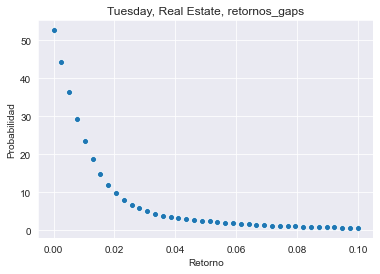

In [14]:
#grafico del retorno versus probabilidad de exito dato un escenario en particular
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_style("darkgrid")
plt.title("Tuesday, Real Estate, retornos_gaps")
sns.scatterplot(data=df_grafico_prob, x="Retorno", y="Probabilidad")

el siguiente bloque es para graficar los graficos de barra de la diapositiva 20

In [67]:
#creamos un dataframe para los graficos de barras (0.02)
x = [ 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday',]
y = []
for i in x:
     z = probabilidad_exito(indice = 'retornos_gaps', dia = i, sector = 'Real Estate', x = 0.02)
     y.append(z)
y = np.array(y)
d = {'Dia': x, 'Probabilidad (retorno > 0.02)': y}
df_grafico_prob_dias = pd.DataFrame(data = d)

<AxesSubplot:title={'center':'JUNIOR: % de retorno > 0.02, en Real Estate'}, xlabel='Dia', ylabel='Probabilidad (retorno > 0.02)'>

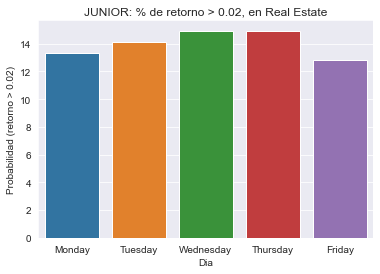

In [66]:
#grafico del la probabilidad de conseguir un retorno de 0.02 por dia
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_style("darkgrid")
plt.title("JUNIOR: % de retorno > 0.02, en Real Estate")
sns.barplot(data=df_grafico_prob_dias, x="Dia", y="Probabilidad (retorno > 0.02)")

LA PREGUNTA 3 Y 4 SE RESPONDEN USANDO POWERBI

PARA LA PREGUNTA 5, UTILIZO UNA NUEVA VARIABLE, LA CUAL ES EL PRECIO TARGET
ES BASICAMENTE EL PRECIO DE COTIZACION ESPERADO DE UNA EMPRESA EN BASE A MUCHAS FACTORES(ECONOMIA, FINANZAS,ETC)
PRETENDO SACAR EL RENDIMIENTO ESPERADO PARA 2022, COMO LA DIFERENCIA ENTRE EL PRECIO TARGET Y LA ULTIMA COTIZACION (EN LOG)

# DESCARGO DE YAHOO FINANCE EL PRECIO TARGET PARA ALGUNAS EMPRESAS
# ATENCION: NO ES HARDCODEO INTENCIONAL. TOME SOLAMENTE 150 EMPRESAS APROX, PORQUE SE TARDA UNA ETERMIDAD EN DESCARGAR (CASI 1 HORA ESAS 150)

In [28]:
import yfinance as yf
lista = ['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE',
       'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
       'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK',
       'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA',
       'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK',
       'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX',
       'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA',
       'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 
       'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
       'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP',
       'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD',
       'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME',
       'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED',
       'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI',
       'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL']
lista_target = []
for i in (lista):
    e= yf.Ticker(i).info['targetLowPrice']
    lista_target.append(e)
    print(i,e)





MMM 118
AOS 49
ABT 111
ABBV 135
ABMD 260
ACN None
ATVI 75
ADM 67
ADBE 362
ADP 199
AAP 142
AES 24
AFL 53
A None
APD 255
AKAM 90
ALK 58
ALB 135
ARE 140
ALGN 260
ALLE 100
LNT 60
ALL 118
GOOGL 2506
GOOG 2650
MO 43
AMZN 107
AMCR 11
AMD 97
AEE 87
AAL 9
AEP 84
AXP 146
AIG 50
AMT 180
AWK 139
AMP 253
ABC 155
AME 135
AMGN 185
APH 75
ADI 173
ANSS 219
AON 250
APA 40
AAPL 155
AMAT 100
APTV 72
ANET 114
AJG 140
AIZ 185
T 14
ATO 107
ADSK 185
AZO 1795
AVB 208
AVY 188
BKR 32
BALL 65
BAC 33.25
BBWI None
BAX 70
BDX 255
WRB 67
BBY 65
BIO 685
TECH 370
BIIB 185
BLK 536
BK 43
BA None
BKNG 1890
BWA 30
BXP 104
BSX 44
BMY 63
AVGO 554
BR 161
BRO 68
CHRW 63
CDNS 160
CZR 90
CPT 163
CPB 38
COF 86
CAH 51
KMX 74
CCL None
CARR 43
CTLT 110
CAT 164
CBOE 118
CBRE 95
CDW 204.5
CE 140
CNC 82
CNP 30
CDAY None
CF 93
CRL 280
SCHW 74
CHTR 379
CVX 135
CMG 1335
CB None
CHD 77
CI 230
CINF 129
CTAS 357
CSCO 40
C 49
CFG 33
CTXS 85
CLX 115
CME 200
CMS 59
KO 58.42
CTSH 68
CL 65
CMCSA 40
CMA 82
CAG 31
COP 83.9
ED 71
STZ 225
CEG 46
COO 

# CREO UN DATAFRAME CON LOS PRECIOS TARGETS Y LOS SYMBOLS

In [30]:
c = {'Symbol': lista , 'Target_price': lista_target}
df_futuro = pd.DataFrame(data = c)
df_futuro.to_csv('borrador_futuro.csv')

# CREO OTRO CON LA ULTIMA FECHA(DEL ORIGINAL)

In [37]:
df_ultima_coticacion = df[df['Date'] == '2021-12-30']


LOS CONCATENO PARA PODER TRABAJAR CON LA INFO RELEVANTE
LUEGO DROPEO LAS COLUMNAS QUE NO ME INTERESAN

In [46]:
df_rf = pd.merge(df_futuro, df_ultima_coticacion, on='Symbol', how='inner')
df_rf

,Symbol,Target_price,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,...,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,variacion,volatilidad,retornos_gaps,retornos_intra,dif_low_high
0,MMM,118.0,2021-12-30,178.869995,179.179993,177.580002,177.639999,174.179047,1067300.0,Thursday,...,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902,-0.004316,0.011702,-0.004325,-0.006900,0.008970
1,AOS,49.0,2021-12-30,85.900002,86.739998,85.269997,85.290001,84.596825,608100.0,Thursday,...,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,-0.006060,0.017606,-0.006078,-0.007127,0.017092
2,ABT,111.0,2021-12-30,141.410004,141.750000,140.589996,141.000000,139.946625,2809100.0,Thursday,...,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,-0.001346,0.013400,-0.001347,-0.002904,0.008217
3,ABBV,135.0,2021-12-30,135.750000,136.830002,135.630005,135.929993,133.400192,6354300.0,Thursday,...,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),0.004211,0.012678,0.004202,0.001325,0.008809
4,ABMD,260.0,2021-12-30,361.329987,370.510010,361.329987,362.059998,362.059998,232900.0,Thursday,...,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981,0.000608,0.021056,0.000608,0.002018,0.025089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,CVS,98.0,2021-12-30,103.989998,104.559998,103.449997,103.680000,102.596886,2484500.0,Thursday,...,Health Care Services,"Woonsocket, Rhode Island",1957-03-04,64803,1996,-0.000193,0.013228,-0.000193,-0.002985,0.010673
132,DHI,70.0,2021-12-30,108.379997,108.879997,107.129997,107.510002,106.885696,1038000.0,Thursday,...,Homebuilding,"Arlington, Texas",2005-06-22,882184,1978,-0.007844,0.020315,-0.007875,-0.008060,0.016203
133,DVA,80.0,2021-12-30,113.339996,114.860001,113.199997,113.279999,113.279999,465000.0,Thursday,...,Health Care Facilities,"Denver, Colorado",2008-07-31,927066,1979,-0.001322,0.017373,-0.001323,-0.000529,0.014558
134,DE,283.0,2021-12-30,345.809998,348.049988,341.839996,342.029999,341.160278,1538800.0,Thursday,...,Agricultural & Farm Machinery,"Moline, Illinois",1957-03-04,315189,1837,-0.007631,0.018906,-0.010702,-0.010991,0.018003


In [48]:
#Borramos las columnas que no son relevantes y rows vacias
df_rf.columns
df_rf.drop(columns=[ 'High', 'Low', 
       'Adj Close', 'Volume', 'day_of_week', 'month', 'Security',
       'SEC filings',  'GICS Sub-Industry',
       'Headquarters Location', 'Date first added', 'CIK', 'Founded',
       'variacion', 'volatilidad', 'retornos_gaps', 'retornos_intra',
       'dif_low_high'], inplace = True)
df_rf.dropna(inplace=True)

# CALCULO EL RETORNO ESPERADO

In [49]:
#Calculamos el retorno esperado a una anio, desde la ultima cotizacion del 2021
df_rf['retorno_esp'] = np.log(df_rf['Target_price']/df_rf['Close'])

# GUARDO ESTE DATAFRAME DEFINITIVO EN UN CSV

In [50]:
#lo guardamos en un csv 
df_rf.to_csv('ret_futures.csv')

En que empresa invierto --> en las que tiene mayor rentabilidad esperada

# FINALMENTE HAGO EL RANKING DE LAS EMPRESAS CON MAYOR RENDIMIENTO ESPERADO

In [54]:
df_rf.sort_values('retorno_esp', ascending=False).head(10)

,Symbol,Target_price,Date,Open,Close,GICS Sector,retorno_esp
43,APA,40.0,2021-12-30,27.910000,27.059999,Energy,0.390823
127,CTRA,27.0,2021-12-30,20.070000,19.549999,Energy,0.322862
56,BKR,32.0,2021-12-30,24.150000,23.950001,Energy,0.289768
97,CF,93.0,2021-12-30,73.459999,71.879997,Materials,0.257601
62,WRB,67.0,2021-12-30,55.206669,54.353333,Financials,0.209187
49,AIZ,185.0,2021-12-30,155.479996,154.789993,Financials,0.178287
121,COP,83.9,2021-12-30,73.080002,72.279999,Energy,0.149078
36,ABC,155.0,2021-12-30,134.000000,133.770004,Health Care,0.147303
135,DAL,45.0,2021-12-30,39.060001,39.040001,Industrials,0.142076
101,CVX,135.0,2021-12-30,118.129997,117.430000,Energy,0.139432


# Y LO GRAFICO

<AxesSubplot:title={'center':'Empresas con mayor perspectiva para el 2022'}, xlabel='Symbol', ylabel='retorno_esp'>

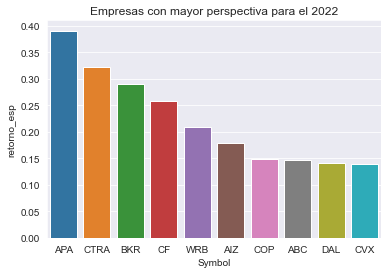

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_style("darkgrid")
plt.title("Empresas con mayor perspectiva para el 2022")
sns.barplot(data=df_rf.sort_values('retorno_esp', ascending=False).head(10), x="Symbol", y="retorno_esp")